In [1]:
!pip install -q -U google-generativeai

In [2]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [3]:
# Used to securely store your API key
from google.colab import userdata

In [4]:
import os
os.environ['GOOGLE_API_KEY']="API_KEY"

In [5]:
genai.configure(api_key=os.environ['GOOGLE_API_KEY'])

In [6]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [7]:
model = genai.GenerativeModel('gemini-1.0-pro-001')

In [9]:
from google.protobuf.json_format import ParseError
from IPython.display import Markdown, display

prompti = """Based on the following data on What indivisual Insight can you give for each company- Return on Common Equity
Year Pepsi Coca Cola Nike
1996 0.72 0.69 0.24
1997 1.36 0.82 0.2
1998 1.31 0.71 0.17
1999 1.37 0.49 0.26
2000 1.42 0.44 0.26
2001 1.42 0.8 0.27
2002 1.33 0.62 0.31
2003 1.68 0.89 0.22
2004 2.05 0.01 0.44
2005 2.44 1.02 0.56
2006 2.39 1.08 0.33
2007 3.34 1.29 0.73
2008 3.41 1.25 0.94
2009 3.21 1.47 0.76
2010 3.77 2.53 0.97
2011 3.91 1.85 1.1
2012 4.03 1.97 1.18
2013 3.92 1.9 1.35
2014 4.32 1.6 1.49
2015 4.27 1.67 1.85
2016 3.67 1.49 2.16
2017 4.36 1.49 2.51
2018 3.38 1.5 1.17
2019 8.78 2.07 2.49
2020 5.2 1.79 1.6
2021 5.12 2.25 3.56
2022 5.49 2.19 3.75
2023 6.5 2.47 3.23"""
prompt = prompti
response = model.generate_content(prompt)


In [11]:
# Define the to_markdown function
def to_markdown(text):
    if isinstance(text, dict):
        text = text.get('text', '')
    text = str(text).replace('•', '  *')
    return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

# Check if the response contains text and image data
if isinstance(response, dict):
    text_content = response.get('text', '')
    image_data = response.get('image_data', None)

    # Display text using Markdown
    print(to_markdown(text_content))

    # Display image if image data is provided
    if image_data:
        display_image(image_data)
else:
    print("Response format not recognized.")


Response format not recognized.


In [12]:
# Check if the response is of type GenerateContentResponse and has candidates
if hasattr(response, 'candidates') and response.candidates:
    # Extract the text content from the first candidate
    candidate = response.candidates[0]
    text_content = candidate.content.parts[0].text

    # Display the text content using Markdown
    display(to_markdown(text_content))
else:
    print("No candidates found in the response.")


> **Pepsi**
> 
> * Pepsi's return on common equity (ROE) has generally been higher than that of Coca-Cola and Nike over the past 27 years.
> * Pepsi's ROE has been especially strong in recent years, with the company achieving double-digit ROEs in each of the past five years.
> * This strong ROE performance is likely due to a combination of factors, including Pepsi's strong brand portfolio, its efficient cost structure, and its focus on innovation.
> 
> **Coca-Cola**
> 
> * Coca-Cola's ROE has been more volatile than that of Pepsi over the past 27 years.
> * However, Coca-Cola's ROE has generally been higher than that of Nike.
> * In recent years, Coca-Cola's ROE has been relatively weak, with the company struggling to generate consistent growth.
> * This weak ROE performance is likely due to a combination of factors, including Coca-Cola's exposure to emerging markets, its reliance on sugary drinks, and its lack of innovation.
> 
> **Nike**
> 
> * Nike's ROE has been the lowest of the three companies over the past 27 years.
> * Nike's ROE has also been more volatile than that of Pepsi and Coca-Cola.
> * In recent years, Nike's ROE has been improving, with the company benefiting from strong demand for its products in both developed and emerging markets.
> * However, Nike's ROE is still below that of Pepsi and Coca-Cola, which suggests that the company has more work to do in order to improve its profitability.

Saving aps_ResNet_Qn_train_Qb_train_log.png to aps_ResNet_Qn_train_Qb_train_log.png


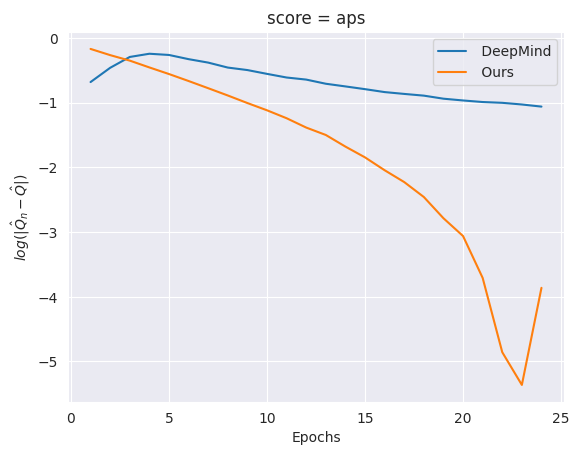

In [ ]:
from PIL import Image
from io import BytesIO
import IPython.display as display

# Importing files module for file upload in Google Colab
from google.colab import files

# Ask the user to upload an image file
uploaded_file = files.upload()

# Get the uploaded file name
file_name = next(iter(uploaded_file))

# Open the uploaded image file
img = Image.open(BytesIO(uploaded_file[file_name]))
display.display(img)


In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')

In [ ]:
response = model.generate_content(img)

to_markdown(response.text)

>  The plot shows the natural logarithm of the negative APS as a function of the number of epochs for AlphaStar and our method.